In [1]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import PIL #importing pillow for image processing
from PIL import Image#importing image from pillow library
import skimage#importing skimage library
import os#importing os library
import time#importing time library

#Capture start time of the program
start_time = time.time()

In [2]:
from string import digits
#code to remove numbers in a string and assigning it to the variable
r_digits = str.maketrans('', '', digits)
#taking source data folder path to a varible
rawdata_path = 'D://DKIT//dissertation//Related_Papers//test//'
#changing current librbay to source data
os.chdir(rawdata_path)
#taking sub-directories to a list
dirs = os.listdir()
directories = []
diseases = []
#Taking directories into a list and extract disease name from folder name
for x in dirs:
    res = x.translate(r_digits).lower()
    diseases.append(res)
    temp = rawdata_path + x + '//'
    directories.append(temp)

In [3]:
#creating different dataframes for saving data in different vector forms
#gray data
gray_df = pd.DataFrame(columns=['mean','disease'])
#rgb data
rgb_df = pd.DataFrame(columns=['mean','disease'])
#red data
red_df = pd.DataFrame(columns=['mean','disease'])
#green data
green_df = pd.DataFrame(columns=['mean','disease'])
#blue data
blue_df = pd.DataFrame(columns=['mean','disease'])

In [4]:
#extracting data from images
x = 0
#creating enpty directories to save the vector from in to a list
gray_test = []
rgb_final = []
red_final = []
green_final = []
blue_final = []
disease = []
#reading data directory by directory
for i in directories:
    os.chdir(i)
    k = diseases[x]
    pics = os.listdir()
    #reading pics one by one in each directory
    for j in pics:
        temp_list = []
        rgb_temp = []
        red_temp = []
        green_temp = []
        blue_temp = []
        gray = []
        data = []
        red = []
        green = []
        blue = []
        #opening the image in rgb format
        image = Image.open(j,mode='r')
        data = image.convert('RGB')
        data = np.array(data)
        #extracting only red components
        red = data[:,:,0]
        #extracting only green components
        green = data[:,:,1]
        #extracting only blue components
        blue = data[:,:,2]
        data = data.ravel()
        #saving rgb vector data into list
        rgb_final.append(data)
        rgb_temp.append(np.mean(data))
        rgb_temp.append(k)
        rgb_df.loc[len(rgb_df)] = rgb_temp
        #saving red channel data into dataframe and vector data to a list.
        red = red.ravel()
        red_final.append(red)
        red_temp.append(np.mean(red))
        red_temp.append(k)
        red_df.loc[len(red_df)] = red_temp
        #saving blue channel data into dataframe and vector data to a list.
        blue = blue.ravel()
        blue_final.append(blue)
        blue_temp.append(np.mean(blue))
        blue_temp.append(k)
        blue_df.loc[len(blue_df)] = blue_temp
        #saving green channel data into dataframe and vector data to a list.
        green = green.ravel()
        green_final.append(green)
        green_temp.append(np.mean(green))
        green_temp.append(k)
        green_df.loc[len(green_df)] = green_temp
        #opening the image in gray format
        gray = image.convert('L')
        gray = np.array(gray)
        gray = gray.ravel()
        gray_test.append(gray)
        temp_list.append(np.mean(gray))
        temp_list.append(k)       
        gray_df.loc[len(gray_df)] = temp_list
    x = x+1

In [5]:
os.chdir('D://DKIT//dissertation//Related_Papers//data//')

In [6]:
#saving the lists as numpy arrays in the local system
np.save('gray_test',gray_test)
np.save('rgb_data',rgb_final)
np.save('red_data',red_final)
np.save('green_data',green_final)
np.save('blue_data',blue_final)

In [7]:
#saving the dataframe as csv files in the local system
gray_df.to_csv('gray_data.csv',index=False)
rgb_df.to_csv('rgb_data.csv',index=False)
red_df.to_csv('red_data.csv',index=False)
green_df.to_csv('green_data.csv',index=False)
blue_df.to_csv('blue_data.csv',index=False)

In [9]:
rgb_test = np.load('rgb_data.npy')

In [10]:
rgb_test

array([[154, 144, 143, ..., 111,  93,  91],
       [181, 166, 171, ..., 142, 126, 127],
       [144, 145, 140, ..., 103, 104,  99],
       ...,
       [145, 133, 135, ..., 133, 127, 139],
       [181, 170, 178, ..., 135, 119, 129],
       [ 91,  79,  81, ..., 201, 195, 195]], dtype=uint8)

In [19]:
rgb1 = rgb_test[0]

In [20]:
rgb1

array([154, 144, 143, ..., 111,  93,  91], dtype=uint8)

In [21]:
rgb_final[500]

array([145, 133, 133, ..., 102,  96,  96], dtype=uint8)

In [25]:
rgb1 = np.reshape(rgb1,(227,227,3))

In [26]:
img = Image.fromarray(rgb1,'RGB')

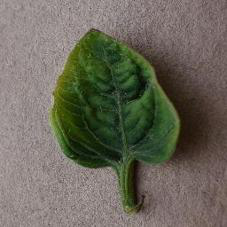

In [27]:
img